# Node Classfication (SpectralClustering) over pre-defined edge weights

In [1]:
### import libraries
from sklearn.cluster import SpectralClustering
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import figure
from adjustText import adjust_text
from node2vec import Node2Vec
from gensim import models
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
df1 = pd.read_csv('Example_Data/Data _instance_from_Firefox.csv')
df2 = pd.read_csv('Example_Data/Data_Instance_Made_from_Notepad.csv')
df1.columns = ['from', 'to', 'weight']
df2.columns = ['from', 'to', 'weight']
df2['weight'] = df2['weight']/100
df2

,from,to,weight
0,New,Open,0.80
1,New,Save,0.50
2,New,Save As,0.50
3,New,Page Setup,0.40
4,New,Print,0.40
...,...,...,...
248,Font,View Help,0.01
249,Font,About Notepad,0.01
250,Status Bar,View Help,0.01
251,Status Bar,About Notepad,0.01


5

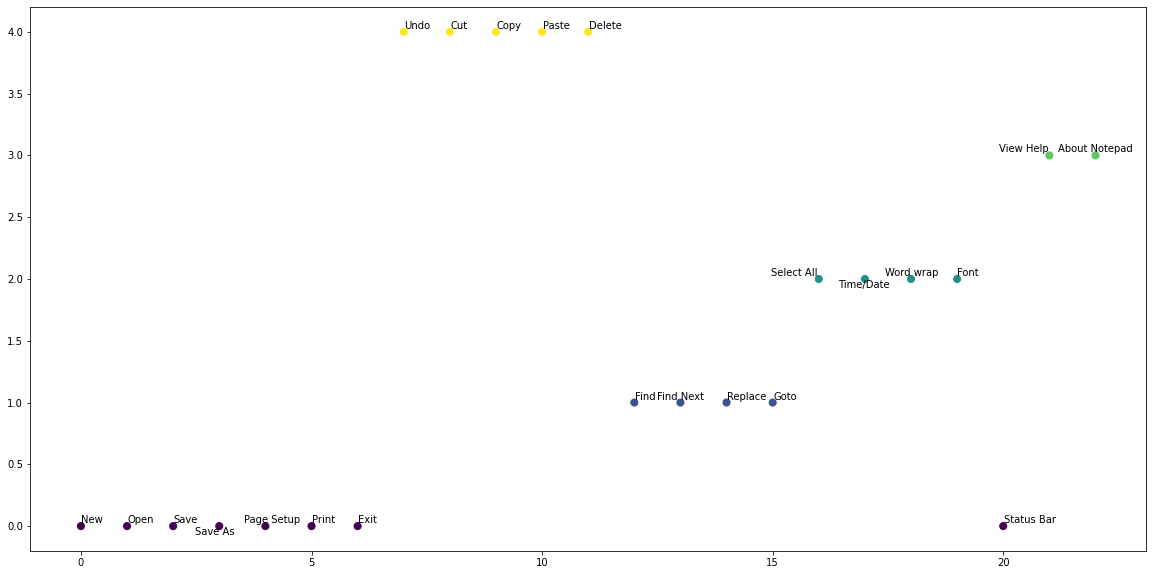

In [3]:
'''Graph creation and initialization'''
# default edge weight=1
G=nx.from_pandas_edgelist(df2, 'from', 'to', ['weight'])

'''Matrix creation'''
adj_matrix = nx.to_numpy_matrix(G) #Converts graph to an adj matrix with adj_matrix[i][j] represents weight between node i,j.
nodes_list = list(G.nodes()) #returns a list of nodes with index mapping with the a 
number_of_nodes = len(nodes_list)
nodes_list_index = list(range(number_of_nodes))
n_clusters = int(np.ceil(np.log2(number_of_nodes)))

'''Spectral Clustering'''
clusters = SpectralClustering(affinity = 'precomputed', assign_labels="discretize",random_state=5,n_clusters=n_clusters).fit_predict(adj_matrix)


'''Figure'''
figure = plt.gcf() # get current figure
figure.set_size_inches(20, 10)
plt.scatter(nodes_list_index,clusters,c=clusters, s=50, cmap='viridis')
texts = [plt.text(nodes_list_index[i], clusters[i], txt , ha='center', va='center') for i, txt in enumerate(nodes_list)]
adjust_text(texts) #adjusting annotations

# Node2Vec

In [4]:
# Generate walks
G=nx.from_pandas_edgelist(df2, 'from', 'to', ['weight'])
nodes_list = list(G.nodes())
node2vec = Node2Vec(G, dimensions=10, walk_length=8, num_walks=100)


# Learn embeddings 
model = node2vec.fit(window=5, min_count=1)


Computing transition probabilities:   0%|          | 0/23 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 100/100 [00:00<00:00, 252.11it/s]


In [5]:
def wordsim(word1,word2):
    word1 = model.wv.get_vector(word1).reshape(1,-1)
    word2 = model.wv.get_vector(word2).reshape(1,-1)
    return cosine_similarity(word1,word2)

## TSNE over node2vec

6

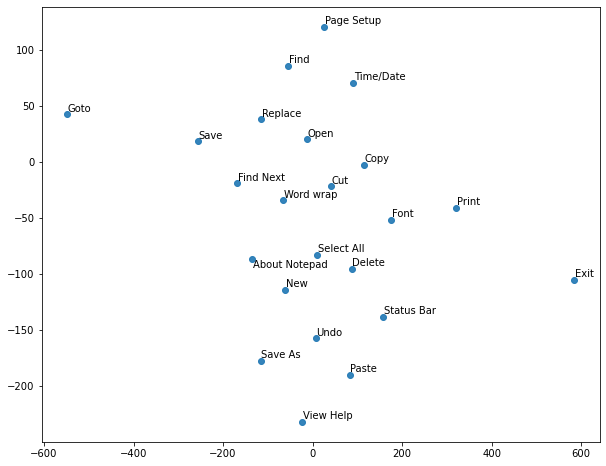

In [6]:
# Retrieve node embeddings and corresponding subjects
node_ids = list(model.wv.index_to_key)  # list of node IDs
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality
# Apply t-SNE transformation on node embeddings
tsne = TSNE(n_components=2)
node_embeddings_2d = tsne.fit_transform(node_embeddings)
alpha=0.9
plt.figure(figsize=(10,8))
plt.scatter(node_embeddings_2d[:,0],
            node_embeddings_2d[:,1],
            cmap="jet", alpha=alpha)

texts = [plt.text(node_embeddings_2d[:,0][i], node_embeddings_2d[:,1][i], txt , ha='center', va='center') for i, txt in enumerate(node_ids)]
adjust_text(texts) #adjusting annotations

## Kmeans Coloring : TSNE over node2vec

6

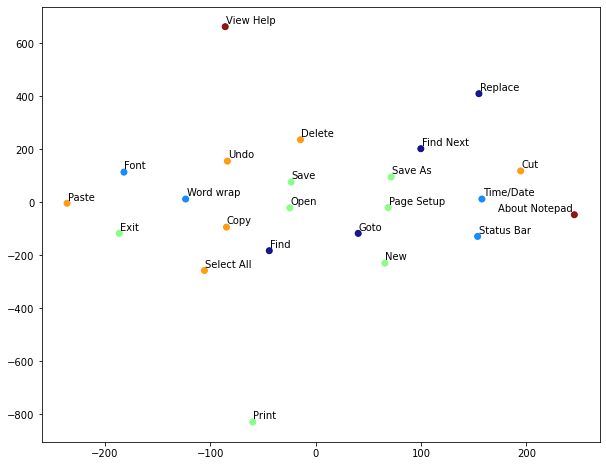

In [7]:
nodes_list = list(G.nodes()) #returns a list of nodes with index mapping with the a 
number_of_nodes = len(nodes_list)
n_clusters = int(np.ceil(np.log2(number_of_nodes)))

# Retrieve node embeddings and corresponding subjects
node_ids = list(model.wv.index_to_key)  # list of node IDs
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(node_embeddings) #kmeans
node_colors = kmeans.labels_
# Apply t-SNE transformation on node embeddings
tsne = TSNE(n_components=2)
node_embeddings_2d = tsne.fit_transform(node_embeddings)
alpha=0.9
plt.figure(figsize=(10,8))
plt.scatter(node_embeddings_2d[:,0],
            node_embeddings_2d[:,1],
            c=node_colors,
            cmap="jet", alpha=alpha)

texts = [plt.text(node_embeddings_2d[:,0][i], node_embeddings_2d[:,1][i], txt , ha='center', va='center') for i, txt in enumerate(node_ids)]
adjust_text(texts) #adjusting annotations

## Kmeans Coloring

5

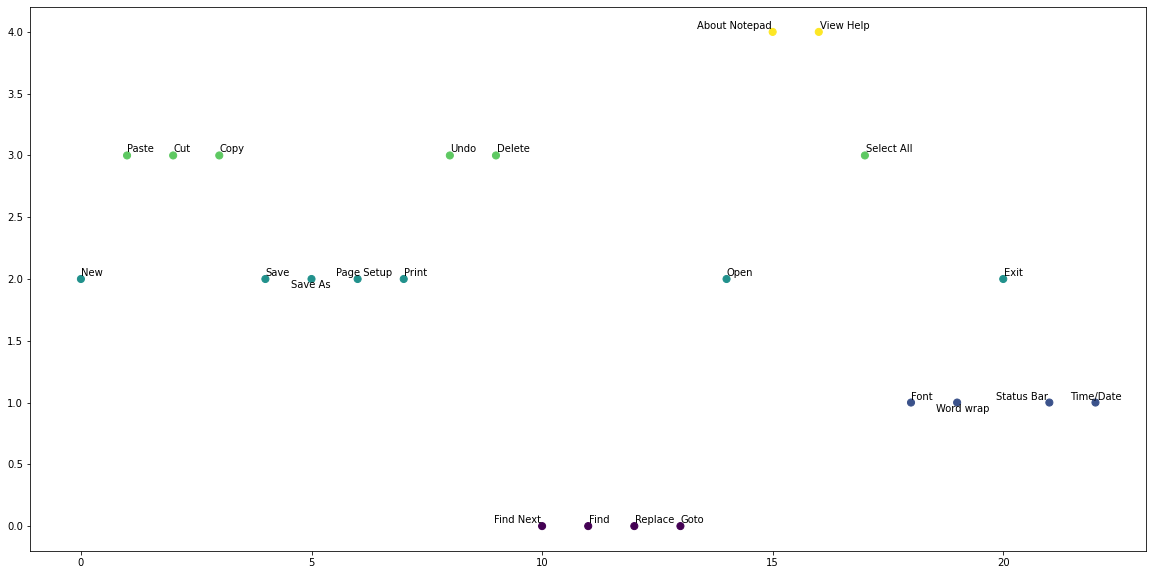

In [8]:
nodes_list_index = list(range(number_of_nodes))
figure = plt.gcf() # get current figure
figure.set_size_inches(20, 10)
plt.scatter(nodes_list_index,node_colors,c=node_colors, s=50, cmap='viridis')
texts = [plt.text(nodes_list_index[i], node_colors[i], txt , ha='center', va='center') for i, txt in enumerate(node_ids)]
adjust_text(texts) #adjusting annotations

## Make a new graph over new cosine similarites

In [9]:
G2 = nx.Graph()
for i in nodes_list:
    for j in nodes_list:
        if i!=j:
            G2.add_edge(i, j, weight= cosine_similarity(model.wv.get_vector(i).reshape(1,-1), model.wv.get_vector(j).reshape(1,-1)))

5

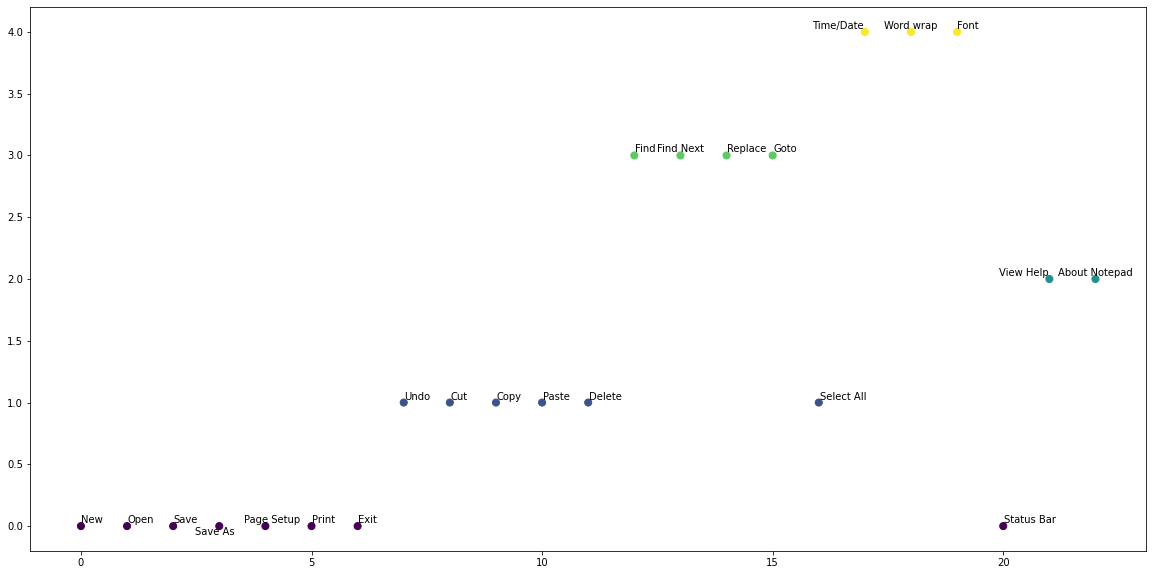

In [10]:
'''Matrix creation'''
adj_matrix2 = nx.to_numpy_matrix(G2) #Converts graph to an adj matrix with adj_matrix[i][j] represents weight between node i,j.
nodes_list2 = list(G2.nodes()) #returns a list of nodes with index mapping with the a 
number_of_nodes2 = len(nodes_list2)
nodes_list_index2 = list(range(number_of_nodes2))
n_clusters2 = int(np.ceil(np.log2(number_of_nodes2)))

'''Spectral Clustering'''
clusters2 = SpectralClustering(affinity = 'precomputed', assign_labels="discretize",random_state=5,n_clusters=n_clusters2).fit_predict(adj_matrix2)


'''Figure'''
figure2 = plt.gcf() # get current figure
figure2.set_size_inches(20, 10)
plt.scatter(nodes_list_index2,clusters2,c=clusters2, s=50, cmap='viridis')
texts2 = [plt.text(nodes_list_index2[i], clusters2[i], txt , ha='center', va='center') for i, txt in enumerate(nodes_list2)]
adjust_text(texts2) #adjusting annotations

In [11]:
wordsim('Cut', 'Select All')

array([[0.94898415]], dtype=float32)

# Pre-trained Word2vec

In [12]:
# Load Google's pre-trained Word2Vec model.
vectors = models.KeyedVectors.load_word2vec_format('../GoogleNews-vectors-negative300.bin', binary=True)

In [13]:
X = vectors['close'].reshape(1,-1)
Y = vectors['open'].reshape(1,-1)

In [14]:
cosine_similarity(X, Y)

array([[0.46365127]], dtype=float32)